In [ ]:
!pip install vaderSentiment # for Emotionally Charged
# For K-Mediods
!pip install gower
!pip install scikit-learn-extra
!pip install pyclustering
#For K-Modes
!pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy
# For Emotionally Charged
import nltk
from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tqdm_notebook as tqdm
from tqdm import trange
# For Narrative Writing
import textblob
from textblob.sentiments import NaiveBayesAnalyzer
from tqdm.notebook import tqdm
# For K-Mediods
from sklearn.preprocessing import LabelEncoder
from sklearn_extra.cluster import KMedoids
from pyclustering.cluster.silhouette import silhouette
from sklearn.metrics import silhouette_score
import gower
# For K-Modes
from kmodes.kmodes import KModes


In [ ]:
bs = pd.read_csv('fake.csv')  #BSDetector dataset
test = pd.read_csv('test.csv')

In [ ]:
bs

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12994,f1b5d0e44803f48732bde854a9fdf95837219b12,2,replaceme,2016-10-26T23:58:00.000+03:00,NaN,It DOES allow you to put a dog face on top of ...,english,2016-10-27T00:37:46.194+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12995,36011ceba3647e1bea78299b68b6fb705a1fc1ad,3,Freedumb,2016-10-27T00:02:00.000+03:00,NaN,Wait till you see what happens to the valuatio...,english,2016-10-27T00:37:46.220+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12996,6995d1aa9ac99926106489b14b5530e85358059a,4,major major maj...,2016-10-27T00:06:00.000+03:00,NaN,I'm waiting for the one that puts a pussy on m...,english,2016-10-27T00:37:46.244+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs
12997,7de8ae90eee164eb756db6c8a3772288e11d7a94,5,beemasters,2016-10-27T00:09:00.000+03:00,NaN,$4 Billion even after they are known to be kee...,english,2016-10-27T00:37:46.247+03:00,zerohedge.com,US,2435.0,"Snapchat To Raise Up To $4 Billion In IPO, Val...",0.000,NaN,40,32,0,0,0,bs


In [ ]:
test

,Unnamed: 0,authors,publish_date,title,text,source,images,Fact_Checked,News_Type,Label
0,0,tokyowashi (noreply@blogger.com),2016-10-27T06:14:00.000+03:00,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,abeldanger.net,NaN,No,Fake,Sensationalist
1,1,Anonymous,2016-10-26T23:12:00.000+03:00,NaN,"So ,you have Rothschild banksters and British ...",abeldanger.net,NaN,No,Fake,Persuasive
2,2,Anonymous,2016-10-26T22:48:00.000+03:00,NaN,Here is the problem . The USA constitution sta...,abeldanger.net,NaN,No,Fake,Persuasive
3,3,Anonymous,2016-10-26T22:35:00.000+03:00,NaN,There is plenty of proof the machines are rigg...,abeldanger.net,NaN,No,Fake,Satire
4,4,Anonymous,2016-10-26T22:19:00.000+03:00,NaN,Trump has an excuse now to audit any vote with...,abeldanger.net,NaN,No,Fake,Satire
...,...,...,...,...,...,...,...,...,...,...
95,95,Claire Corkery,22-09-2016,"US boy, six, asks Obama if he can adopt Omran ...",Story highlights Boy sent letter to Barack Oba...,http://cnn.it,http://i2.cdn.cnn.com/cnnnext/dam/assets/16091...,Yes,Real,Real
96,96,"Colin Taylor,Grant Stern,Brett Bose,Natalie Di...",20-09-2016,New York Times Will FINALLY Start Calling Trum...,36.2k SHARES SHARE THIS STORY\n\nThe New York ...,http://occupydemocrats.com,http://occupydemocrats.com/wp-content/uploads/...,Yes,Real,Opinion
97,97,"Jack Shafer,Matthew Nussbaum",24-08-2017,Trump 'happy' he didn't bring up Bill Clinton'...,Trump 'happy' he didn't bring up Bill Clinton'...,http://politi.co,http://v.politico.com/images/1155968404/201609...,Yes,Real,Opinion
98,98,"Abc News,More Ali",27-09-2016,How Congress Can Override President Obama's Ve...,"On Wednesday, the Senate is expected to overri...",http://abcn.ws,http://a.abcnews.com/images/Politics/ap_Congre...,Yes,Real,Real


In [ ]:
test.drop(['Unnamed: 0'], axis = 1, inplace = True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   authors       82 non-null     object
 1   publish_date  99 non-null     object
 2   title         67 non-null     object
 3   text          100 non-null    object
 4   source        100 non-null    object
 5   images        60 non-null     object
 6   Fact_Checked  100 non-null    object
 7   News_Type     100 non-null    object
 8   Label         100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [ ]:
bs.shape

(12999, 20)

In [ ]:
arr = bs['type'].unique()
bs['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

In [ ]:
for i in arr:
    print(i, bs[bs['type'] == i].shape)

bias (443, 20)
conspiracy (430, 20)
fake (19, 20)
bs (11492, 20)
satire (146, 20)
hate (246, 20)
junksci (102, 20)
state (121, 20)


In [ ]:
bs.drop(bs[bs['type'] == 'bs'].index, inplace = True)
bs.drop(bs[bs['type'] == 'junksci'].index, inplace = True)
bs.drop(bs[bs['type'] == 'state'].index, inplace = True)

In [ ]:
bs['type'].unique()

array(['bias', 'conspiracy', 'fake', 'satire', 'hate'], dtype=object)

In [ ]:
bs.shape

(1284, 20)

In [ ]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 12695
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   uuid                1284 non-null   object 
 1   ord_in_thread       1284 non-null   int64  
 2   author              925 non-null    object 
 3   published           1284 non-null   object 
 4   title               1177 non-null   object 
 5   text                1238 non-null   object 
 6   language            1284 non-null   object 
 7   crawled             1284 non-null   object 
 8   site_url            1284 non-null   object 
 9   country             1284 non-null   object 
 10  domain_rank         1096 non-null   float64
 11  thread_title        1284 non-null   object 
 12  spam_score          1284 non-null   float64
 13  main_img_url        970 non-null    object 
 14  replies_count       1284 non-null   int64  
 15  participants_count  1284 non-null   int64  
 16  likes

In [ ]:
bs.rename(columns = {'author' : 'authors', 'site_url' : 'source', 'published' : 'publish_date' , 'main_img_url' : 'images'}, inplace = True)

In [ ]:
bs.drop(['uuid', 'ord_in_thread', 'language', 'crawled', 'country', 'domain_rank', 'thread_title', 'spam_score', 
         'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type'], axis = 1, inplace = True)

In [ ]:
bs['Fact_Checked'] = 'No'  # Feature 1 : 'Fact Checked'

In [ ]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1284 entries, 0 to 12695
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   authors       925 non-null    object
 1   publish_date  1284 non-null   object
 2   title         1177 non-null   object
 3   text          1238 non-null   object
 4   source        1284 non-null   object
 5   images        970 non-null    object
 6   Fact_Checked  1284 non-null   object
dtypes: object(7)
memory usage: 80.2+ KB


In [ ]:
#def date(dt):
    #return dt[0:10]
def date(dt):
    return dt.split('T')[0]

In [ ]:
#convert publish_date(datetime format) in bs to date format only, then combine bs, buzz_real, buzz_fake etc to get df
bs['publish_date'] = bs['publish_date'].apply(date)

In [ ]:
bs['publish_date']

0        2016-10-26
1        2016-10-29
2        2016-10-31
3        2016-11-01
4        2016-11-01
            ...    
12691    2016-10-27
12692    2016-10-27
12693    2016-10-27
12694    2016-10-27
12695    2016-10-27
Name: publish_date, Length: 1284, dtype: object

In [ ]:
# FakeNewsNet dataset
buzz_real = pd.read_csv('BuzzFeed_real_news_content.csv')
buzz_fake = pd.read_csv('BuzzFeed_fake_news_content.csv')
pol_real = pd.read_csv('PolitiFact_real.csv')

In [ ]:
buzz_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             91 non-null     object
 4   top_img         91 non-null     object
 5   authors         84 non-null     object
 6   source          91 non-null     object
 7   publish_date    89 non-null     object
 8   movies          4 non-null      object
 9   images          91 non-null     object
 10  canonical_link  90 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [ ]:
buzz_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              91 non-null     object
 1   title           91 non-null     object
 2   text            91 non-null     object
 3   url             83 non-null     object
 4   top_img         81 non-null     object
 5   authors         57 non-null     object
 6   source          83 non-null     object
 7   publish_date    78 non-null     object
 8   movies          21 non-null     object
 9   images          81 non-null     object
 10  canonical_link  80 non-null     object
 11  meta_data       91 non-null     object
dtypes: object(12)
memory usage: 8.7+ KB


In [ ]:
pol_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              119 non-null    object
 1   title           119 non-null    object
 2   text            119 non-null    object
 3   url             117 non-null    object
 4   top_img         117 non-null    object
 5   authors         106 non-null    object
 6   source          117 non-null    object
 7   publish_date    110 non-null    object
 8   movies          7 non-null      object
 9   images          117 non-null    object
 10  canonical_link  114 non-null    object
 11  meta_data       119 non-null    object
dtypes: object(12)
memory usage: 11.3+ KB


In [ ]:
buzz_real.groupby('source')['source'].count()  #delete this cell later

source
http://abcn.ws                     9
http://addictinginfo.org           2
http://cnn.it                     23
http://conservativebyte.com        1
http://eaglerising.com             7
http://freedomdaily.com            1
http://occupydemocrats.com         1
http://politi.co                  32
http://rightwingnews.com           7
http://winningdemocrats.com        1
http://www.addictinginfo.org       3
http://www.ifyouonlynews.com       2
http://www.opposingviews.com       1
https://www.washingtonpost.com     1
Name: source, dtype: int64

In [ ]:
buzz_fake.groupby('source')['source'].count() # delete this cell later

source
http://100percentfedup.com             2
http://addictinginfo.org               1
http://allenwestrepublic.com           2
http://author.addictinginfo.org        1
http://author.groopspeak.com           1
http://clashdaily.com                  2
http://conservativebyte.com            1
http://conservativetribune.com         2
http://eaglerising.com                11
http://freedomdaily.com               16
http://occupydemocrats.com             6
http://rightwingnews.com              17
http://theblacksphere.net              2
http://usherald.com                    2
http://winningdemocrats.com            2
http://www.addictinginfo.org           3
http://www.chicksontheright.com        1
http://www.proudcons.com               2
http://www.thepoliticalinsider.com     3
http://www.yesimright.com              1
https://goo.gl                         3
https://ihavethetruth.com              2
Name: source, dtype: int64

In [ ]:
pol_real.groupby('source')['source'].count()  # delete this cell later

source
http://abcn.ws                      9
http://addictinginfo.org            2
http://author.addictinginfo.org     4
http://cnn.it                      22
http://conservativebyte.com         3
http://eaglerising.com              5
http://freedomdaily.com             3
http://newsbake.com                 3
http://occupydemocrats.com          9
http://politi.co                   42
http://rightwingnews.com            4
http://winningdemocrats.com         1
http://www.addictinginfo.org        5
http://www.chicksontheright.com     1
http://www.cnn.com                  1
http://www.liberalamerica.org       1
http://www.opposingviews.com        2
Name: source, dtype: int64

In [ ]:
bs.groupby('source')['source'].count()  # delete this cell later

source
100percentfedup.com          33
21stcenturywire.com          24
abcnews.com.co                2
activistpost.com            100
addictinginfo.org            20
adobochronicles.com          13
awdnews.com                 100
clickhole.com               100
dailywire.com                88
davidduke.com                46
frontpagemag.com            100
globalresearch.ca             1
infowars.com                100
legorafi.fr                  46
newstarget.com                5
politicususa.com            100
prisonplanet.com            100
projectveritas.com            1
redstatewatcher.com           1
returnofkings.com           100
thelastlineofdefense.org      4
westernjournalism.com       100
wnd.com                     100
Name: source, dtype: int64

In [ ]:
buzz_real.drop(['id','url', 'top_img','movies', 'canonical_link', 'meta_data'], axis = 1, inplace = True)
buzz_fake.drop(['id','url', 'top_img','movies', 'canonical_link', 'meta_data'], axis = 1, inplace = True)
pol_real.drop(['id','url', 'top_img','movies', 'canonical_link', 'meta_data'], axis = 1, inplace = True)

In [ ]:
buzz_real['Fact_Checked'] = 'Yes'
buzz_fake['Fact_Checked'] = 'No'
pol_real['Fact_Checked'] = 'Yes'


buzz_real['News_Type']= 'Real'  #17/02
pol_real['News_Type']= 'Real'
bs['News_Type'] = 'Fake'
buzz_fake['News_Type'] = 'Fake'

In [ ]:
#df = bs.append([buzz_real, buzz_fake, pol_real])
df = pd.concat([bs, buzz_real, buzz_fake, pol_real], ignore_index=True)

In [ ]:
df.shape

(1585, 8)

In [ ]:
df


,authors,publish_date,title,text,source,images,Fact_Checked,News_Type
0,Barracuda Brigade,2016-10-26,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,No,Fake
1,reasoning with facts,2016-10-29,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,No,Fake
2,Barracuda Brigade,2016-10-31,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,No,Fake
3,Fed Up,2016-11-01,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,No,Fake
4,Fed Up,2016-11-01,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,No,Fake
...,...,...,...,...,...,...,...,...
1580,"Matthew Karnitschnig,Janosch Delcker",2016-09-23,"Donald Trump, Germany’s disfavored son – POLITICO","KALLSTADT, Germany — Few places in Germany are...",http://politi.co,http://g8fip1kplyr33r3krz5b97d1.wpengine.netdn...,Yes,Real
1581,Nancy Wells,2016-09-19,BREAKING: Hollywood Legend Just Died Of Terrib...,Hollywood loses yet another one of their deare...,http://newsbake.com,http://0.gravatar.com/avatar/0d702c6042933cd78...,Yes,Real
1582,"Jack Shafer,Robert Strauss",2017-08-24,Worst. President. Ever.,"As my 25th wedding anniversary approached, I t...",http://politi.co,"data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEK...",Yes,Real
1583,Jeremy Diamond,2016-09-21,Don King drops N-word while introducing Donald...,Story highlights Trump was sitting in a chair ...,http://cnn.it,http://i2.cdn.cnn.com/cnnnext/dam/assets/12102...,Yes,Real


## Site Pedigree & Registration Irregularities

### Train



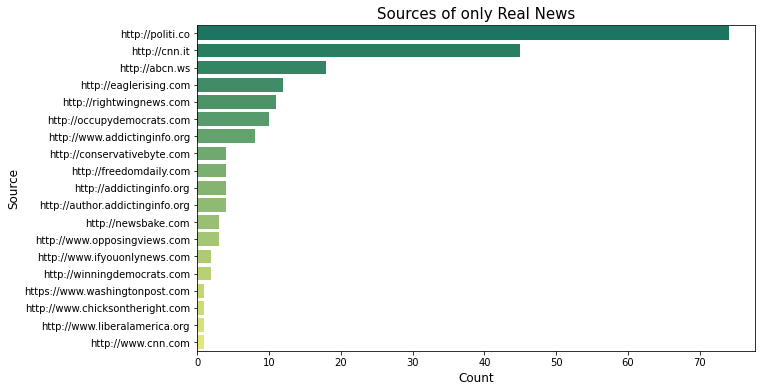

In [ ]:
real_order=df[df['News_Type']=='Real']['source'].value_counts().sort_values(ascending=False).index #17/02

plt.figure(figsize=(10,6))
sns.countplot(y='source', data=df[df['News_Type']=='Real'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of only Real News',fontsize=15)
plt.show()

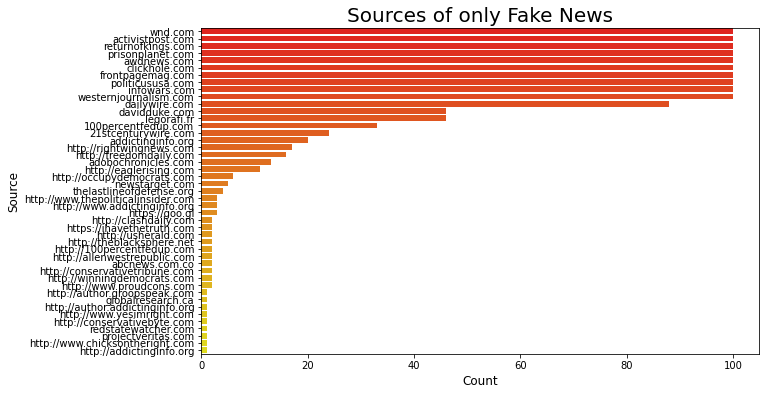

In [ ]:
fake_order=df[df['News_Type']=='Fake']['source'].value_counts().sort_values(ascending=False).index #17/02

plt.figure(figsize=(10,6))
sns.countplot(y='source',data=df[df['News_Type']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Sources of only Fake News',fontsize=20)
plt.show()

In [ ]:
dubious_sources = [] #common sources of publishing both fake and real news      17/02
only_real = []  # sources publishing only real news

for x in df[df['News_Type']=='Real']['source'].unique():
    if x in df[df['News_Type']=='Fake']['source'].unique():
        dubious_sources.append(x)
    else:
        only_real.append(x)
print(dubious_sources)
print(only_real)

['http://eaglerising.com', 'http://rightwingnews.com', 'http://occupydemocrats.com', 'http://conservativebyte.com', 'http://freedomdaily.com', 'http://www.addictinginfo.org', 'http://addictinginfo.org', 'http://winningdemocrats.com', 'http://www.chicksontheright.com', 'http://author.addictinginfo.org']
['http://abcn.ws', 'http://politi.co', 'http://cnn.it', 'http://www.opposingviews.com', 'http://www.ifyouonlynews.com', 'https://www.washingtonpost.com', 'http://newsbake.com', nan, 'http://www.liberalamerica.org', 'http://www.cnn.com']


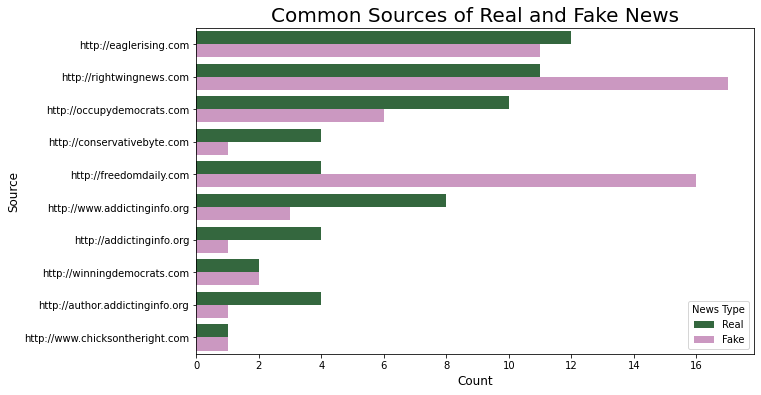

In [ ]:
df['common']=df['source'].apply(lambda x: x if x in dubious_sources else 0) #17/02
df1=df[df['common']!=0]   #drop coloumn 'common' later on

plt.figure(figsize=(10,6))
sns.countplot(y='common',data=df1, hue = 'News_Type', palette='cubehelix')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.legend(loc='best', title='News Type',fontsize=10)
plt.title('Common Sources of Real and Fake News',fontsize=20)
plt.show()

In [ ]:
pedigree_sites = ['http://occupydemocrats.com', 'http://www.addictinginfo.org', 'http://addictinginfo.org', 'http://author.addictinginfo.org', 'http://eaglerising.com']#17/02
pedigree_sites = pedigree_sites + only_real

In [ ]:
pedigree_sites

['http://occupydemocrats.com',
 'http://www.addictinginfo.org',
 'http://addictinginfo.org',
 'http://author.addictinginfo.org',
 'http://eaglerising.com',
 'http://abcn.ws',
 'http://politi.co',
 'http://cnn.it',
 'http://www.opposingviews.com',
 'http://www.ifyouonlynews.com',
 'https://www.washingtonpost.com',
 'http://newsbake.com',
 nan,
 'http://www.liberalamerica.org',
 'http://www.cnn.com']

In [ ]:
# Feature 2 : 'Site_Pedigree'
df['Site_Pedigree'] = 'No' #17/02
for i in pedigree_sites:
    df.loc[df['source'] == i, 'Site_Pedigree'] = 'Yes'

In [ ]:
df.drop('common', axis = 1, inplace = True)#17/02

In [ ]:
df.isnull().sum() #total count of missing values per column

authors          413
publish_date      24
title            107
text              46
source            10
images           326
Fact_Checked       0
News_Type          0
Site_Pedigree      0
dtype: int64

In [ ]:
df.drop(df[df['text'].isnull() == True].index, inplace = True)
#df.dropna(subset=['text'], inplace = True)

In [ ]:
df.shape

(1539, 9)

In [ ]:
df['source'].unique().size

54

In [ ]:
df['source'].unique()

array(['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co',
       'activistpost.com', 'addictinginfo.org', 'adobochronicles.com',
       'awdnews.com', 'clickhole.com', 'dailywire.com', 'davidduke.com',
       'frontpagemag.com', 'globalresearch.ca', 'infowars.com',
       'newstarget.com', 'politicususa.com', 'prisonplanet.com',
       'projectveritas.com', 'redstatewatcher.com', 'returnofkings.com',
       'thelastlineofdefense.org', 'westernjournalism.com', 'wnd.com',
       'http://eaglerising.com', 'http://abcn.ws',
       'http://rightwingnews.com', 'http://politi.co', 'http://cnn.it',
       'http://occupydemocrats.com', 'http://www.opposingviews.com',
       'http://www.ifyouonlynews.com', 'http://conservativebyte.com',
       'http://freedomdaily.com', 'http://www.addictinginfo.org',
       'https://www.washingtonpost.com', 'http://addictinginfo.org',
       'http://winningdemocrats.com', 'http://www.proudcons.com',
       'http://allenwestrepublic.com', 'http://10

In [ ]:
np.sum(df['source'] == 'http://www.cnn.com')  # delete this cell later

1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1584
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   authors        1172 non-null   object
 1   publish_date   1515 non-null   object
 2   title          1432 non-null   object
 3   text           1539 non-null   object
 4   source         1529 non-null   object
 5   images         1259 non-null   object
 6   Fact_Checked   1539 non-null   object
 7   News_Type      1539 non-null   object
 8   Site_Pedigree  1539 non-null   object
dtypes: object(9)
memory usage: 120.2+ KB


In [ ]:
# Rename the feature Registration Inconsistency as Registration Irregularities
# Feature 3 : 'Registration_Irregularities'
df['Registration_Irregularities'] = 'No'   #default value

#urls with irregularities in registration
web = ['100percentfedup.com', '21stcenturywire.com', 'abcnews.com.co', 'adobochronicles.com', 'awdnews.com', 'dailywire.com', 'davidduke.com',
       'frontpagemag.com', 'globalresearch.ca', 'politicususa.com', 'redstatewatcher.com', 'thelastlineofdefense.org', 'westernjournalism.com',
       'wnd.com', 'http://www.ifyouonlynews.com', 'http://conservativebyte.com', 'http://freedomdaily.com', 'http://www.proudcons.com', 
       'http://allenwestrepublic.com', 'http://100percentfedup.com', 'https://goo.gl', 'http://usherald.com', 'http://theblacksphere.net',
       'http://author.groopspeak.com', 'http://clashdaily.com', 'http://www.yesimright.com', 'http://www.thepoliticalinsider.com',
       'http://conservativetribune.com', 'https://ihavethetruth.com']



In [ ]:
for i in web:
    df.loc[df['source'] == i, 'Registration_Irregularities'] = 'Yes'

In [ ]:
df.groupby('Registration_Irregularities')['Registration_Irregularities'].count()

Registration_Irregularities
No     776
Yes    763
Name: Registration_Irregularities, dtype: int64

In [ ]:
df.index = [x for x in np.arange(0, 1539)]

In [ ]:
df.shape

(1539, 10)

### Test

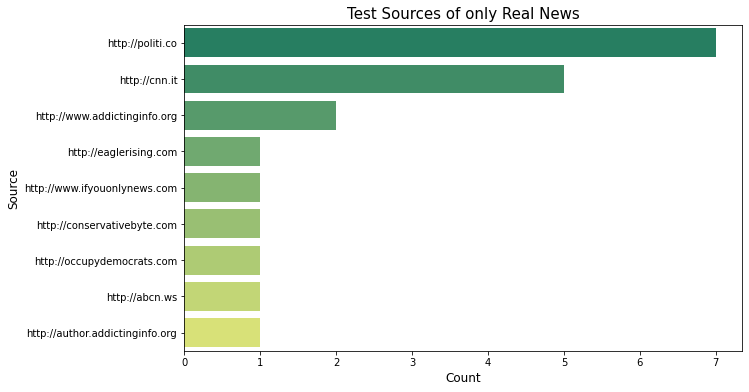

In [ ]:
real_order=test[test['News_Type']=='Real']['source'].value_counts().sort_values(ascending=False).index #17/02

plt.figure(figsize=(10,6))
sns.countplot(y='source', data=test[test['News_Type']=='Real'],order=real_order,palette='summer')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Test Sources of only Real News',fontsize=15)
plt.show()

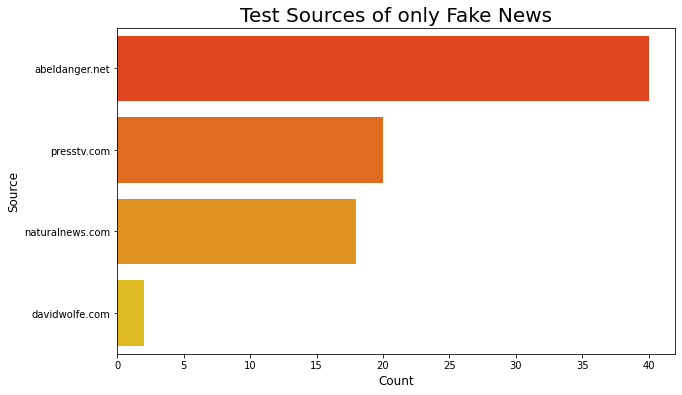

In [ ]:
fake_order=test[test['News_Type']=='Fake']['source'].value_counts().sort_values(ascending=False).index #17/02

plt.figure(figsize=(10,6))
sns.countplot(y='source',data=test[test['News_Type']=='Fake'],order=fake_order,palette='autumn')
plt.xlabel('Count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Test Sources of only Fake News',fontsize=20)
plt.show()

In [ ]:
test_dubious_sources = [] #common sources of publishing both fake and real news      
test_only_real = []  # sources publishing only real news

for x in test[test['News_Type']=='Real']['source'].unique():
    if x in test[test['News_Type']=='Fake']['source'].unique():
        test_dubious_sources.append(x)
    else:
        test_only_real.append(x)
print(test_dubious_sources) # No dubious source
print(test_only_real)

[]
['http://politi.co', 'http://eaglerising.com', 'http://cnn.it', 'http://www.addictinginfo.org', 'http://www.ifyouonlynews.com', 'http://conservativebyte.com', 'http://occupydemocrats.com', 'http://abcn.ws', 'http://author.addictinginfo.org']


In [ ]:
# Feature 2 : 'Site_Pedigree'
test['Site_Pedigree'] = 'No' 
for i in test_only_real:
    test.loc[test['source'] == i, 'Site_Pedigree'] = 'Yes'

In [ ]:
test.isnull().sum() #total count of missing values per column

authors          18
publish_date      1
title            33
text              0
source            0
images           40
Fact_Checked      0
News_Type         0
Label             0
Site_Pedigree     0
dtype: int64

In [ ]:
test['source'].unique().size

13

In [ ]:
test['source'].unique()

array(['abeldanger.net', 'davidwolfe.com', 'naturalnews.com',
       'presstv.com', 'http://politi.co', 'http://eaglerising.com',
       'http://cnn.it', 'http://www.addictinginfo.org',
       'http://www.ifyouonlynews.com', 'http://conservativebyte.com',
       'http://occupydemocrats.com', 'http://abcn.ws',
       'http://author.addictinginfo.org'], dtype=object)

In [ ]:
np.sum(test['source'] == 'http://abcn.ws')  # delete this cell later

1

In [ ]:
# Rename the feature Registration Inconsistency as Registration Irregularities
# Feature 3 : 'Registration_Irregularities'
test['Registration_Irregularities'] = 'No'   #default value

#urls with irregularities in registration

web = ['presstv.com', 'http://www.ifyouonlynews.com', 'http://conservativebyte.com', 'http://abcn.ws']


In [ ]:
for i in web:
    test.loc[test['source'] == i, 'Registration_Irregularities'] = 'Yes'

In [ ]:
test.groupby('Registration_Irregularities')['Registration_Irregularities'].count()

Registration_Irregularities
No     77
Yes    23
Name: Registration_Irregularities, dtype: int64

##Humor

###Train

In [ ]:
# 'Humour.csv' was exported from Amitasha's code which modelled and predicted the feature 'Humour' on our dataset 
humor = pd.read_csv('humor.csv')

In [ ]:
humor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Humor   1539 non-null   object
dtypes: object(1)
memory usage: 12.1+ KB


In [ ]:
df = pd.concat([df, humor], axis=1)

###Test

In [ ]:
test_humor = pd.read_csv('testhumor.csv')

In [ ]:
test_humor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Humor   100 non-null    object
dtypes: object(1)
memory usage: 928.0+ bytes


In [ ]:
test = pd.concat([test, test_humor], axis = 1)

##Emotionally Charged

###Train

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# sentiment scores are of types 'compound', 'positive', 'negative', 'neutral'
# for each article we break it into sentences, calculate the sentiment scores of each sentence and aggregate them to get aggregate sentiment score of article
# then calculate the average sentiment scores of the article by dividing aggregate scores by number of sentences
sentiment_score = []
for article in tqdm(df['text']):

    text = article.replace('\n', '')
    sentence_list = tokenize.sent_tokenize(text) #breaks article into sentences
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
        
    for sentence in sentence_list: 
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']

    if len(sentence_list) != 0:
        sentiments['compound'] = sentiments['compound'] / len(sentence_list)
        sentiments['neg'] = sentiments['neg'] / len(sentence_list)
        sentiments['neu'] = sentiments['neu'] / len(sentence_list)
        sentiments['pos'] = sentiments['pos'] / len(sentence_list)
        sentiment_score.append(sentiments['compound'])
    else:
        sentiment_score.append(0)
    

  0%|          | 0/1539 [00:00<?, ?it/s]

In [ ]:
df['Sentiment'] = sentiment_score

In [ ]:
df['Sentiment']

0       0.015514
1      -0.071275
2       0.245378
3       0.206575
4       0.123511
          ...   
1534    0.109918
1535    0.324688
1536    0.030535
1537    0.249183
1538   -0.074411
Name: Sentiment, Length: 1539, dtype: float64

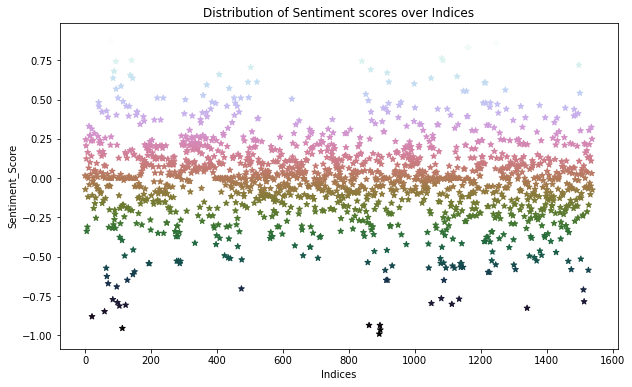

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x = df.index, y = df['Sentiment'], marker = '*', c = df['Sentiment'], cmap = 'cubehelix')
plt.ylabel('Sentiment_Score')
plt.xlabel('Indices')
plt.title('Distribution of Sentiment scores over Indices')
plt.show()

In [ ]:
#Emotionally Charged Threshold = [-1, -0.025] U [0.025, 1]
np.sum((df['Sentiment'] < 0.025) & (df['Sentiment'] > -0.025)) #count of 'Not Emotionally Charged' articles


192

In [ ]:
np.sum((df['Sentiment'] >= 0.025) | (df['Sentiment'] <= -0.025)) #count of 'Emotionally Charged' articles

1347

In [ ]:
df['Emotionally_Charged'] = 'No'
emotionally_charged_index = np.array([x for x in df[(df['Sentiment'] >= 0.025) | (df['Sentiment'] <= -0.025)].index])

In [ ]:
for i in emotionally_charged_index:
    df.loc[i, 'Emotionally_Charged'] = 'Yes'

In [ ]:
# delete this cell later
df.groupby(['Fact_Checked','Emotionally_Charged', 'Registration_Irregularities', 'Site_Pedigree']).size().reset_index().rename(columns={0:'count'})

,Fact_Checked,Emotionally_Charged,Registration_Irregularities,Site_Pedigree,count
0,No,No,No,No,70
1,No,No,No,Yes,2
2,No,No,Yes,No,103
3,No,Yes,No,No,484
4,No,Yes,No,Yes,20
5,No,Yes,Yes,No,650
6,Yes,No,No,No,3
7,Yes,No,No,Yes,14
8,Yes,Yes,No,No,13
9,Yes,Yes,No,Yes,170


###Test

In [ ]:
test_sentiment_score = []
for article in tqdm(test['text']):

    text = article.replace('\n', '')
    sentence_list = tokenize.sent_tokenize(text) #breaks article into sentences
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
        
    for sentence in sentence_list: 
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']

    if len(sentence_list) != 0:
        sentiments['compound'] = sentiments['compound'] / len(sentence_list)
        sentiments['neg'] = sentiments['neg'] / len(sentence_list)
        sentiments['neu'] = sentiments['neu'] / len(sentence_list)
        sentiments['pos'] = sentiments['pos'] / len(sentence_list)
        test_sentiment_score.append(sentiments['compound'])
    else:
        test_sentiment_score.append(0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
test['Sentiment'] = test_sentiment_score

In [ ]:
test['Sentiment']

0     0.107529
1     0.261300
2    -0.465900
3    -0.067975
4     0.105667
        ...   
95    0.411225
96   -0.014637
97    0.720550
98    0.108089
99   -0.120918
Name: Sentiment, Length: 100, dtype: float64

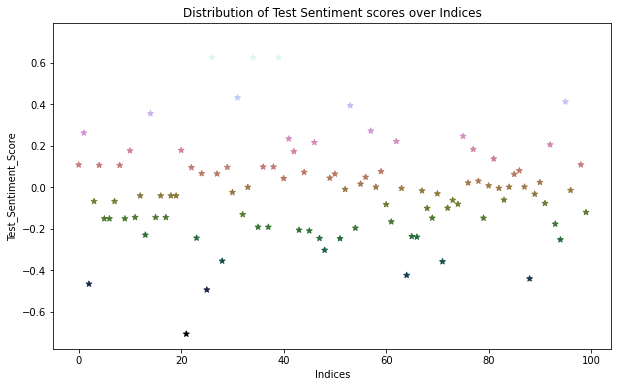

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x = test.index, y = test['Sentiment'], marker = '*', c = test['Sentiment'], cmap = 'cubehelix')
plt.ylabel('Test_Sentiment_Score')
plt.xlabel('Indices')
plt.title('Distribution of Test Sentiment scores over Indices')
plt.show()

In [ ]:
#Emotionally Charged Threshold = [-1, -0.125] U [0.125, 1]
np.sum((test['Sentiment'] < 0.025) & (test['Sentiment'] > -0.025)) #count of 'Not Emotionally Charged' articles

14

In [ ]:
np.sum((test['Sentiment'] >= 0.025) | (test['Sentiment'] <= -0.025)) #count of 'Emotionally Charged' articles

86

In [ ]:
test['Emotionally_Charged'] = 'No'
emotionally_charged_index = np.array([x for x in test[(test['Sentiment'] >= 0.025) | (test['Sentiment'] <= -0.025)].index])

In [ ]:
for i in emotionally_charged_index:
    test.loc[i, 'Emotionally_Charged'] = 'Yes'

## Narrative Writing

###Train

In [ ]:
tb = textblob.Blobber(analyzer = NaiveBayesAnalyzer())

In [ ]:
subjectivity_score = []
for post in tqdm(df['text']):
    sentence_list = tokenize.sent_tokenize(post)
    score = 0
    for sentence in sentence_list:
        score += tb(sentence).subjectivity
    
    if len(sentence_list) != 0:
        score = score/len(sentence_list)
        subjectivity_score.append(score)
    else:
        subjectivity_score.append(0)

  0%|          | 0/1539 [00:00<?, ?it/s]

In [ ]:
df['Subjectivity_Score'] = subjectivity_score  #subjectivity_score ranges [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

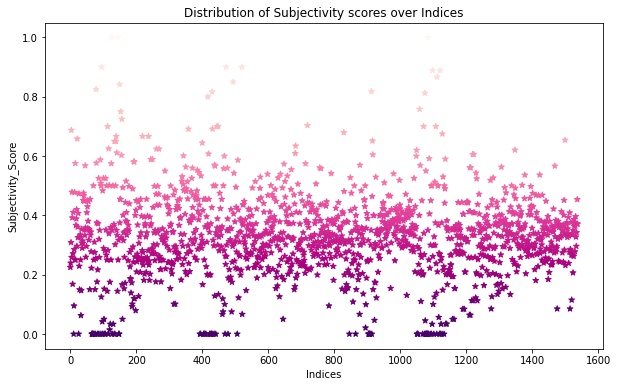

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x = df.index, y = df['Subjectivity_Score'], marker = '*', c = df['Subjectivity_Score'], cmap = 'RdPu_r')
plt.ylabel('Subjectivity_Score')
plt.xlabel('Indices')
plt.title('Distribution of Subjectivity scores over Indices')
plt.show()

In [ ]:
np.sum((df['Subjectivity_Score'] < 0.3)) #Non-Narrative writing

597

In [ ]:
df['Narrative_Writing'] = 'No'
narrative_writing_index = np.array([x for x in df[(df['Subjectivity_Score'] >= 0.3)].index])

In [ ]:
for i in narrative_writing_index:
    df.loc[i, 'Narrative_Writing'] = 'Yes'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   authors                      1172 non-null   object 
 1   publish_date                 1515 non-null   object 
 2   title                        1432 non-null   object 
 3   text                         1539 non-null   object 
 4   source                       1529 non-null   object 
 5   images                       1259 non-null   object 
 6   Fact_Checked                 1539 non-null   object 
 7   News_Type                    1539 non-null   object 
 8   Site_Pedigree                1539 non-null   object 
 9   Registration_Irregularities  1539 non-null   object 
 10  Humor                        1539 non-null   object 
 11  Sentiment                    1539 non-null   float64
 12  Emotionally_Charged          1539 non-null   object 
 13  Subjectivity_Score

In [ ]:
# delete this cell later
df.groupby(['Fact_Checked','Emotionally_Charged', 'Registration_Irregularities', 'Site_Pedigree', 'Narrative_Writing']).size().reset_index().rename(columns={0:'count'})

,Fact_Checked,Emotionally_Charged,Registration_Irregularities,Site_Pedigree,Narrative_Writing,count
0,No,No,No,No,No,30
1,No,No,No,No,Yes,40
2,No,No,No,Yes,No,1
3,No,No,No,Yes,Yes,1
4,No,No,Yes,No,No,52
5,No,No,Yes,No,Yes,51
6,No,Yes,No,No,No,170
7,No,Yes,No,No,Yes,314
8,No,Yes,No,Yes,No,3
9,No,Yes,No,Yes,Yes,17


In [ ]:
df[(df['Narrative_Writing'] == 'No') & (df['Site_Pedigree'] == 'No') & (df['Registration_Irregularities'] == 'Yes') & (df['Sentiment'] < 0) &
    (df['Emotionally_Charged'] == 'Yes') & (df['Fact_Checked'] == 'No')]['Sentiment'].unique()

array([-0.071275  , -0.3104625 , -0.03755   , -0.125     , -0.253825  ,
       -0.04822432, -0.09735   , -0.06751667, -0.1437    , -0.13224286,
       -0.54267143, -0.26515   , -0.11028333, -0.14760667, -0.13895   ,
       -0.35000909, -0.09843333, -0.06906429, -0.04311944, -0.28411875,
       -0.18756818, -0.21462222, -0.33873077, -0.37115   , -0.52812   ,
       -0.1909    , -0.296     , -0.3818    , -0.4926    , -0.1591    ,
       -0.38585   , -0.30374737, -0.08839474, -0.2553    , -0.43445   ,
       -0.34      , -0.04073333, -0.11583333, -0.17673571, -0.18725   ,
       -0.05438889, -0.02744139, -0.21858621, -0.10807143, -0.07785398,
       -0.11268182, -0.24791449, -0.10960833, -0.06571034, -0.24359091,
       -0.37179754, -0.13251791, -0.22084167, -0.22200909, -0.14076531,
       -0.30834865, -0.30868   , -0.04493594, -0.15122821, -0.16755926,
       -0.0373    , -0.10672105, -0.09087222, -0.15370882, -0.0498913 ,
       -0.14465   , -0.10976286, -0.17327647, -0.179868  , -0.11

In [ ]:
col = ['Fact_Checked','Emotionally_Charged', 'Registration_Irregularities', 'Site_Pedigree', 'Narrative_Writing']
for i in col:
  print(df.groupby(i)[i].count())

Fact_Checked
No     1329
Yes     210
Name: Fact_Checked, dtype: int64
Emotionally_Charged
No      192
Yes    1347
Name: Emotionally_Charged, dtype: int64
Registration_Irregularities
No     776
Yes    763
Name: Registration_Irregularities, dtype: int64
Site_Pedigree
No     1331
Yes     208
Name: Site_Pedigree, dtype: int64
Narrative_Writing
No     597
Yes    942
Name: Narrative_Writing, dtype: int64


In [ ]:
df.drop(['authors', 'publish_date', 'title', 'text', 'source', 'images', 'News_Type'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fact_Checked                 1539 non-null   object 
 1   Site_Pedigree                1539 non-null   object 
 2   Registration_Irregularities  1539 non-null   object 
 3   Humor                        1539 non-null   object 
 4   Sentiment                    1539 non-null   float64
 5   Emotionally_Charged          1539 non-null   object 
 6   Subjectivity_Score           1539 non-null   float64
 7   Narrative_Writing            1539 non-null   object 
dtypes: float64(2), object(6)
memory usage: 140.5+ KB


###Test

In [ ]:
test_subjectivity_score = []
for post in tqdm(test['text']):
    sentence_list = tokenize.sent_tokenize(post)
    score = 0
    for sentence in sentence_list:
        score += tb(sentence).subjectivity
    
    if len(sentence_list) != 0:
        score = score/len(sentence_list)
        test_subjectivity_score.append(score)
    else:
        test_subjectivity_score.append(0)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
test['Subjectivity_Score'] = test_subjectivity_score  #subjectivity_score ranges [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

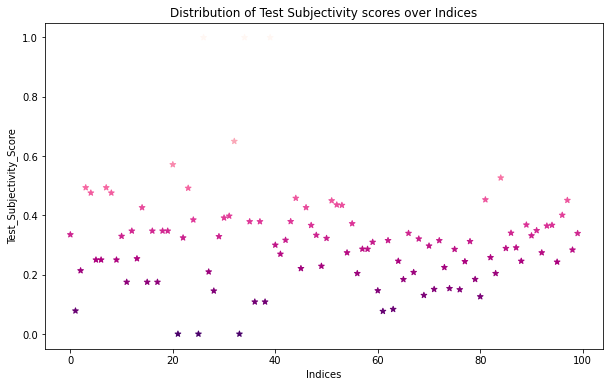

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(x = test.index, y = test['Subjectivity_Score'], marker = '*', c = test['Subjectivity_Score'], cmap = 'RdPu_r')
plt.ylabel('Test_Subjectivity_Score')
plt.xlabel('Indices')
plt.title('Distribution of Test Subjectivity scores over Indices')
plt.show()

In [ ]:
np.sum((test['Subjectivity_Score'] < 0.3)) #Non-Narrative writing

47

In [ ]:
test['Narrative_Writing'] = 'No'
narrative_writing_index = np.array([x for x in test[(test['Subjectivity_Score'] >= 0.3)].index])

In [ ]:
for i in narrative_writing_index:
    test.loc[i, 'Narrative_Writing'] = 'Yes'

In [ ]:
test.drop(['authors', 'publish_date', 'title', 'text', 'source', 'images', 'News_Type'], axis = 1, inplace = True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fact_Checked                 100 non-null    object 
 1   Label                        100 non-null    object 
 2   Site_Pedigree                100 non-null    object 
 3   Registration_Irregularities  100 non-null    object 
 4   Humor                        100 non-null    object 
 5   Sentiment                    100 non-null    float64
 6   Emotionally_Charged          100 non-null    object 
 7   Subjectivity_Score           100 non-null    float64
 8   Narrative_Writing            100 non-null    object 
dtypes: float64(2), object(7)
memory usage: 7.2+ KB


## K-Mediods

###Train

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fact_Checked                 1539 non-null   object 
 1   Site_Pedigree                1539 non-null   object 
 2   Registration_Irregularities  1539 non-null   object 
 3   Humor                        1539 non-null   object 
 4   Sentiment                    1539 non-null   float64
 5   Emotionally_Charged          1539 non-null   object 
 6   Subjectivity_Score           1539 non-null   float64
 7   Narrative_Writing            1539 non-null   object 
dtypes: float64(2), object(6)
memory usage: 140.5+ KB


In [ ]:
import copy

In [ ]:

df1 = copy.deepcopy(df)
df1 = df1[['Fact_Checked', 'Site_Pedigree', 'Registration_Irregularities', 'Humor', 'Emotionally_Charged', 'Narrative_Writing']]

In [ ]:
df1

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
0,No,No,Yes,Yes,No,No
1,No,No,Yes,No,Yes,No
2,No,No,Yes,No,Yes,Yes
3,No,No,Yes,Yes,Yes,Yes
4,No,No,Yes,No,Yes,No
...,...,...,...,...,...,...
1534,Yes,Yes,No,No,Yes,No
1535,Yes,Yes,No,Yes,Yes,Yes
1536,Yes,Yes,No,No,Yes,Yes
1537,Yes,Yes,No,No,Yes,Yes


In [ ]:
 #cat_features tells which column to treat as a categorical variable
gower_mat = gower.gower_matrix(df1,  cat_features = [True, True, True, True, True, True])
# Fit model
kmediods_model = KMedoids(n_clusters = 3, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++') #check max_iter parameter
kmediods_model.fit(gower_mat)

KMedoids(init='k-medoids++', method='pam', metric='precomputed', n_clusters=3,
         random_state=0)

In [ ]:
clusters = kmediods_model.labels_
clusters

array([2, 2, 2, ..., 1, 1, 1])

In [ ]:
#The silhouette coefficient is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).
#A score of 1 denotes the best meaning that the data point i is very compact within the cluster to which it belongs and far away from the other clusters. 
#The worst value is -1. Values near 0 denote overlapping clusters
silhouette_score(X = gower_mat, labels = clusters, metric = 'precomputed')

0.5239172

In [ ]:
Sil_score = []
Cluster_size = np.arange(2,9)
for cluster_nos in Cluster_size:
    kmediods_model = KMedoids(n_clusters = cluster_nos, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++')#check max_iter parameter
    kmediods_model.fit_predict(gower_mat)
    clusters = kmediods_model.labels_
    Sil_score.append(silhouette_score(X = gower_mat, labels = clusters, metric = 'precomputed'))

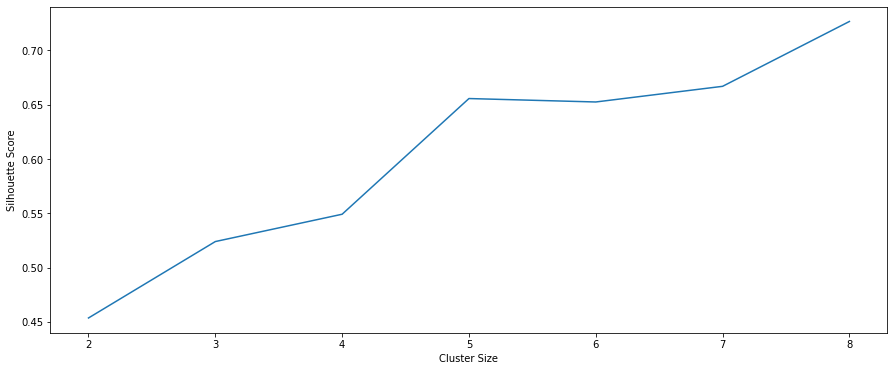

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(Cluster_size, Sil_score)
plt.xlabel('Cluster Size')
plt.ylabel('Silhouette Score')
xint = range(2, 9)
plt.xticks(xint)
plt.show()
# optimum nos of clusters = 8

In [ ]:
# training the model with optimum number of clusters
kmediods_model = KMedoids(n_clusters = 8, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++')
kmediods_model.fit_predict(gower_mat)

array([2, 4, 3, ..., 1, 1, 1])

In [ ]:
final_clusters = kmediods_model.labels_
final_clusters

array([2, 4, 3, ..., 1, 1, 1])

In [ ]:
silhouette_score(X = gower_mat, labels = final_clusters, metric = 'precomputed')

0.7266785

In [ ]:
df1['KMediod_Clusters'] = final_clusters

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Fact_Checked                 1539 non-null   object
 1   Site_Pedigree                1539 non-null   object
 2   Registration_Irregularities  1539 non-null   object
 3   Humor                        1539 non-null   object
 4   Emotionally_Charged          1539 non-null   object
 5   Narrative_Writing            1539 non-null   object
 6   KMediod_Clusters             1539 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 128.5+ KB


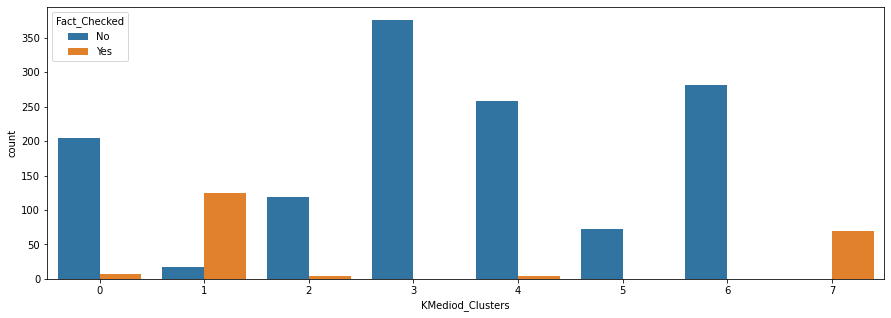

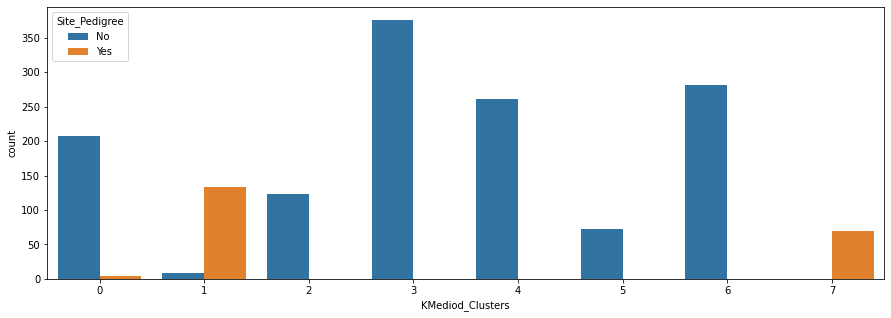

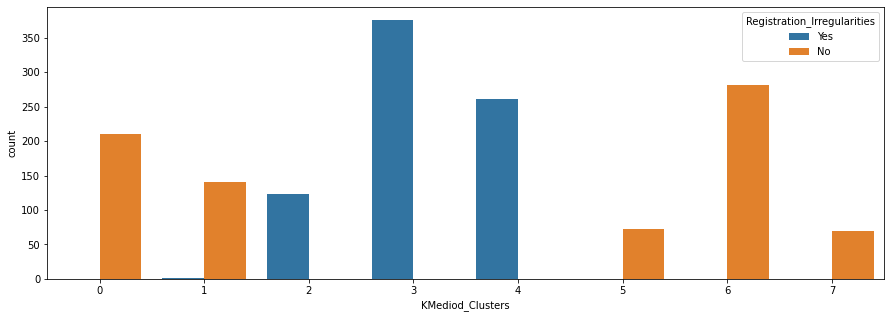

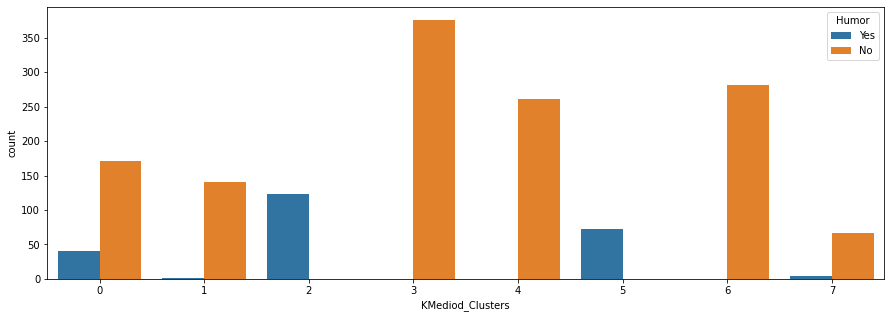

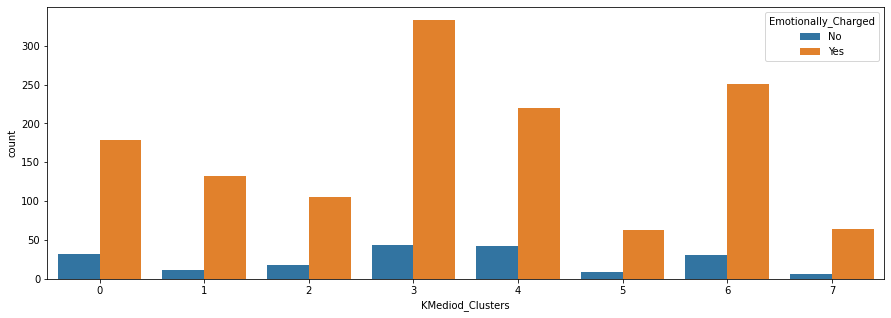

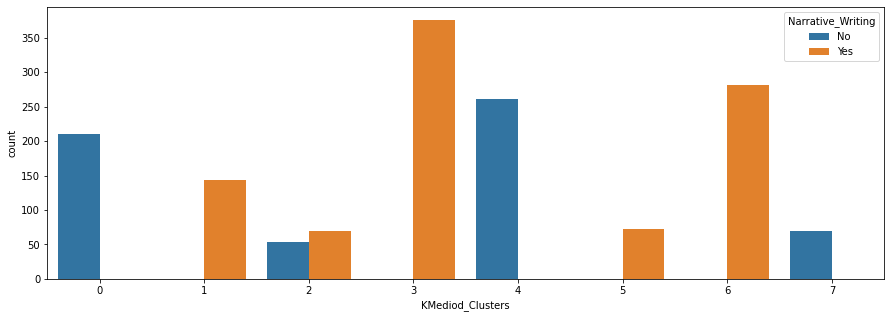

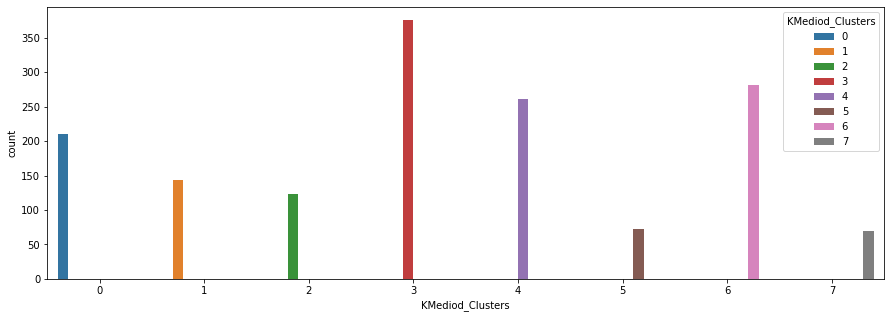

In [ ]:
# for visualization we can take any 2 variables at a time
#plt.figure(figsize=(15,6))
#sns.scatterplot(x = 'Subjectivity_Score', y = 'Sentiment', data = df1, hue = 'KMediod_Clusters', palette = 'husl');
for col in df1.columns:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='KMediod_Clusters',hue=col, data = df1)
    plt.show()

In [ ]:
df1.groupby(['KMediod_Clusters']).size()

KMediod_Clusters
0    211
1    143
2    123
3    376
4    262
5     72
6    282
7     70
dtype: int64

In [ ]:
df1[df1['KMediod_Clusters'] == 0]

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing,KMediod_Clusters
59,No,No,No,No,Yes,No,0
63,No,No,No,No,Yes,No,0
64,No,No,No,No,Yes,No,0
65,No,No,No,No,Yes,No,0
66,No,No,No,No,Yes,No,0
...,...,...,...,...,...,...,...
1415,No,No,No,No,Yes,No,0
1435,Yes,No,No,No,No,No,0
1455,Yes,No,No,No,Yes,No,0
1463,Yes,No,No,No,Yes,No,0


In [ ]:
# See if varying number of clusters while training the model helps
Cluster_Number = np.arange(0, 8)
for i in Cluster_Number:
    print('Cluster Number : ', i)
    print('Fact_Checked:')
    print(df1[df1['KMediod_Clusters'] == i]['Fact_Checked'].value_counts())
    print('Site_Pedigree:')
    print(df1[df1['KMediod_Clusters'] == i]['Site_Pedigree'].value_counts())
    print('Registration_Irregularities:')
    print(df1[df1['KMediod_Clusters'] == i]['Registration_Irregularities'].value_counts())
    print('Humor:')
    print(df1[df1['KMediod_Clusters'] == i]['Humor'].value_counts())
    print('Emotionally Charged:')
    print(df1[df1['KMediod_Clusters'] == i]['Emotionally_Charged'].value_counts())
    print('Narrative Writing:')
    print(df1[df1['KMediod_Clusters'] == i]['Narrative_Writing'].value_counts())
    print('**************************************************************')

Cluster Number :  0
Fact_Checked:
No     204
Yes      7
Name: Fact_Checked, dtype: int64
Site_Pedigree:
No     207
Yes      4
Name: Site_Pedigree, dtype: int64
Registration_Irregularities:
No    211
Name: Registration_Irregularities, dtype: int64
Humor:
No     171
Yes     40
Name: Humor, dtype: int64
Emotionally Charged:
Yes    179
No      32
Name: Emotionally_Charged, dtype: int64
Narrative Writing:
No    211
Name: Narrative_Writing, dtype: int64
**************************************************************
Cluster Number :  1
Fact_Checked:
Yes    125
No      18
Name: Fact_Checked, dtype: int64
Site_Pedigree:
Yes    134
No       9
Name: Site_Pedigree, dtype: int64
Registration_Irregularities:
No     141
Yes      2
Name: Registration_Irregularities, dtype: int64
Humor:
No     141
Yes      2
Name: Humor, dtype: int64
Emotionally Charged:
Yes    132
No      11
Name: Emotionally_Charged, dtype: int64
Narrative Writing:
Yes    143
Name: Narrative_Writing, dtype: int64
********************

###Test

In [ ]:
test1 = copy.deepcopy(test)
test1 = test1[['Fact_Checked', 'Site_Pedigree', 'Registration_Irregularities', 'Humor', 'Emotionally_Charged', 'Narrative_Writing']]

In [ ]:
test1

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
0,No,No,No,No,Yes,Yes
1,No,No,No,Yes,Yes,No
2,No,No,No,No,Yes,No
3,No,No,No,Yes,Yes,Yes
4,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...
95,Yes,Yes,No,Yes,Yes,No
96,Yes,Yes,No,No,No,Yes
97,Yes,Yes,No,Yes,Yes,Yes
98,Yes,Yes,Yes,Yes,Yes,No


In [ ]:
kmediods_model.medoid_indices_ #data points representing the 8 clusters in the trained model

array([ 684, 1429,  439,  416,  510,   79,  861, 1238])

In [ ]:
df1.iloc[kmediods_model.medoid_indices_, :-1]

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
684,No,No,No,No,Yes,No
1429,Yes,Yes,No,No,Yes,Yes
439,No,No,Yes,Yes,Yes,Yes
416,No,No,Yes,No,Yes,Yes
510,No,No,Yes,No,Yes,No
79,No,No,No,Yes,Yes,Yes
861,No,No,No,No,Yes,Yes
1238,Yes,Yes,No,No,Yes,No


In [ ]:
# To run kmediods_model.predict(), we need to pass a N*k(100 * 8) distance matrix(here gower distance) that represents the distance between 'N' test data points and
#  the 'k' mediods in the trained model                  
test1 = pd.concat([test1, df1], ignore_index= True)
test1.drop('KMediod_Clusters', axis = 1, inplace = True)
test1

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
0,No,No,No,No,Yes,Yes
1,No,No,No,Yes,Yes,No
2,No,No,No,No,Yes,No
3,No,No,No,Yes,Yes,Yes
4,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...
1634,Yes,Yes,No,No,Yes,No
1635,Yes,Yes,No,Yes,Yes,Yes
1636,Yes,Yes,No,No,Yes,Yes
1637,Yes,Yes,No,No,Yes,Yes


In [ ]:
test_gower_mat = gower.gower_matrix(test1,  cat_features = [True, True, True, True, True, True])
test_gower_mat = test_gower_mat[0:100, 100:] # gives a gower distance matrix of size (100 * 1539) which even though is not the size(100 * 8), still serves the purpose as
                                             # it contains(as a part of it) the distance between the test data points and the 8 mediods of the trained model
test_clusters = kmediods_model.predict(test_gower_mat)
test_clusters
#test_gower_mat

array([6, 0, 0, 5, 5, 0, 0, 5, 5, 0, 6, 0, 5, 0, 6, 0, 5, 0, 5, 5, 6, 0,
       6, 5, 5, 0, 6, 0, 0, 6, 5, 6, 5, 0, 6, 5, 0, 5, 0, 6, 5, 0, 5, 5,
       5, 0, 5, 5, 5, 0, 5, 5, 5, 5, 0, 5, 0, 0, 0, 5, 4, 4, 2, 4, 2, 2,
       3, 4, 2, 4, 4, 4, 2, 2, 4, 4, 2, 2, 2, 4, 7, 1, 7, 7, 1, 7, 1, 7,
       7, 1, 1, 1, 7, 1, 1, 7, 1, 1, 7, 1])

In [ ]:
test['KMediods_Clusters'] = test_clusters

In [ ]:
#Label our Clusters
test['KMediods_Clusters'] = test['KMediods_Clusters'].map({0 : 'Persuasive', 1 : 'Opinion', 2 : 'Misreporting', 3 : 'Fake', 4 : 'Citizen Journalism', 
                                                           5 : 'Satire', 6 : 'Sensationalist', 7 : 'Real'})

## K-Mode

###Train

In [ ]:
df2 = copy.deepcopy(df)
df2 = df2[['Fact_Checked', 'Site_Pedigree', 'Registration_Irregularities', 'Humor', 'Emotionally_Charged', 'Narrative_Writing']]

In [ ]:
df2

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
0,No,No,Yes,Yes,No,No
1,No,No,Yes,No,Yes,No
2,No,No,Yes,No,Yes,Yes
3,No,No,Yes,Yes,Yes,Yes
4,No,No,Yes,No,Yes,No
...,...,...,...,...,...,...
1534,Yes,Yes,No,No,Yes,No
1535,Yes,Yes,No,Yes,Yes,Yes
1536,Yes,Yes,No,No,Yes,Yes
1537,Yes,Yes,No,No,Yes,Yes


In [ ]:
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1, random_state = 0) # check max_iter parameter
kmode.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1412.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 215, cost: 1221.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 40, cost: 1116.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 287, cost: 1296.0
Run 5, iteration: 2/100, moves: 0, cost: 1296.0
Best run was number 4


array([0, 0, 1, ..., 2, 2, 2], dtype=uint16)

In [ ]:
kmode.cost_

1116.0

In [ ]:
kmode.labels_

array([0, 0, 1, ..., 2, 2, 2], dtype=uint16)

In [ ]:
cost = []
Cluster_size = np.arange(2,15) 
for num_clusters in Cluster_size:
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1, random_state = 0) # check max_iter parameter
    kmode.fit_predict(df2)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 702, cost: 1448.0
Run 2, iteration: 2/100, moves: 56, cost: 1448.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 15, cost: 1632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 447, cost: 1579.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 80, cost: 1448.0
Best run was number 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1632.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1412.0
Init: initializing centroid

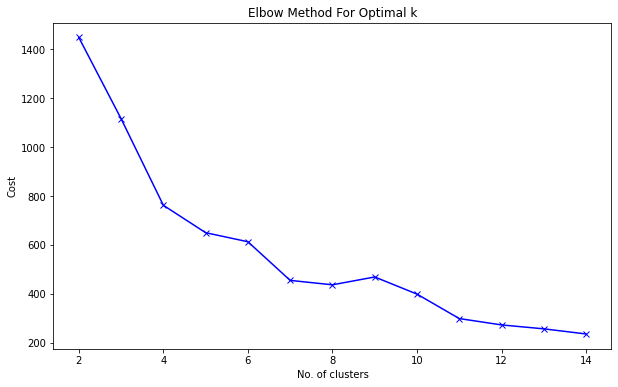

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(Cluster_size, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()
#Optimum nos of clusters = 7-8

In [ ]:
#Training the model with optimum nos of clusters
kmode = KModes(n_clusters=8, init = "random", n_init = 5, verbose=1, random_state = 0) # check max_iter parameter
kmode.fit_predict(df2)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 378, cost: 566.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 229, cost: 872.0
Run 2, iteration: 2/100, moves: 1, cost: 872.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 242, cost: 666.0
Run 3, iteration: 2/100, moves: 234, cost: 460.0
Run 3, iteration: 3/100, moves: 0, cost: 460.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 47, cost: 564.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 302, cost: 437.0
Run 5, iteration: 2/100, moves: 83, cost: 437.0
Best run was number 5


array([6, 4, 1, ..., 0, 0, 0], dtype=uint16)

In [ ]:
kmode.cost_

437.0

In [ ]:
final_clusters = kmode.labels_
final_clusters

array([6, 4, 1, ..., 0, 0, 0], dtype=uint16)

In [ ]:
df2['KMode_Clusters'] = final_clusters

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1539 entries, 0 to 1538
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Fact_Checked                 1539 non-null   object
 1   Site_Pedigree                1539 non-null   object
 2   Registration_Irregularities  1539 non-null   object
 3   Humor                        1539 non-null   object
 4   Emotionally_Charged          1539 non-null   object
 5   Narrative_Writing            1539 non-null   object
 6   KMode_Clusters               1539 non-null   uint16
dtypes: object(6), uint16(1)
memory usage: 119.5+ KB


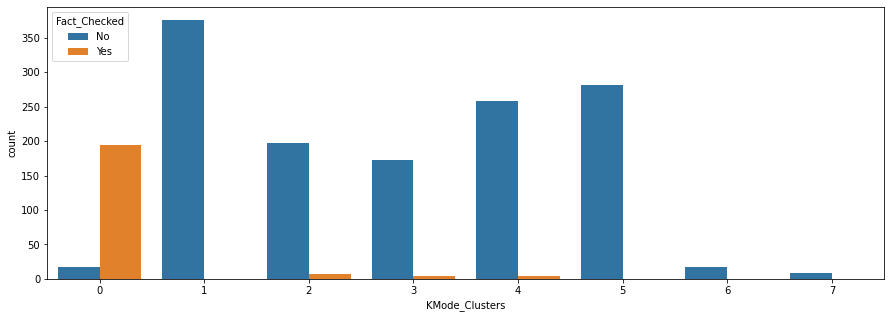

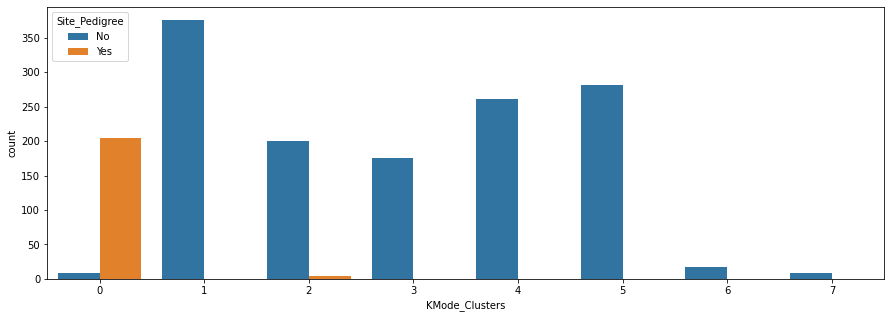

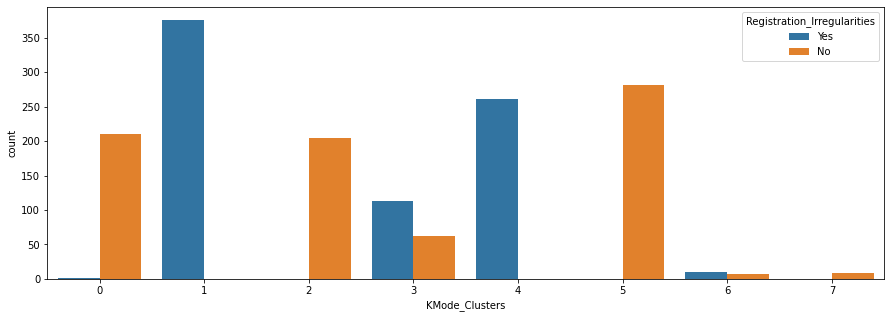

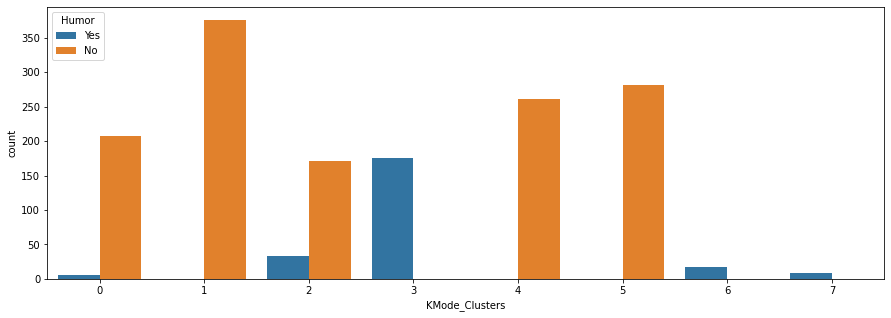

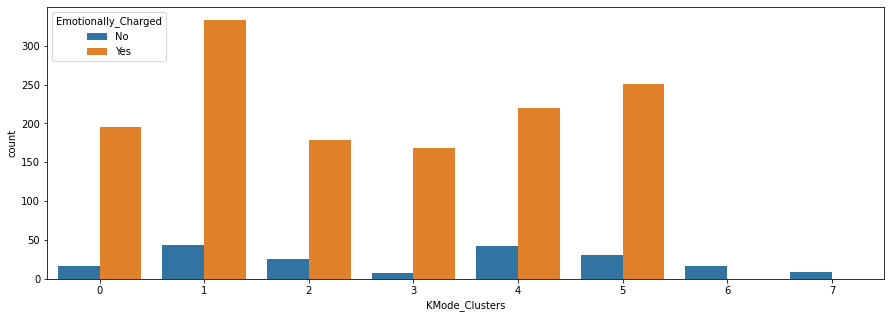

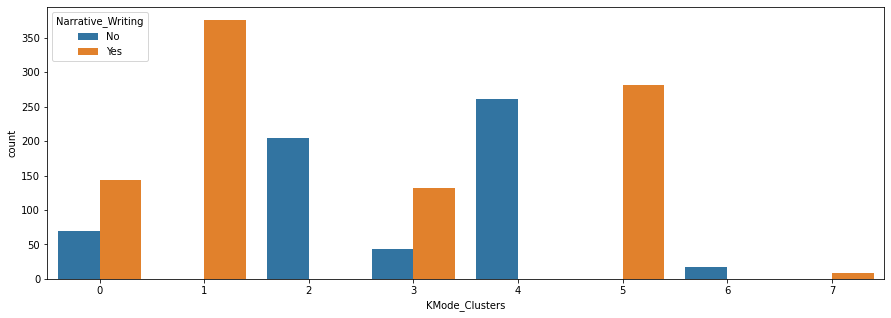

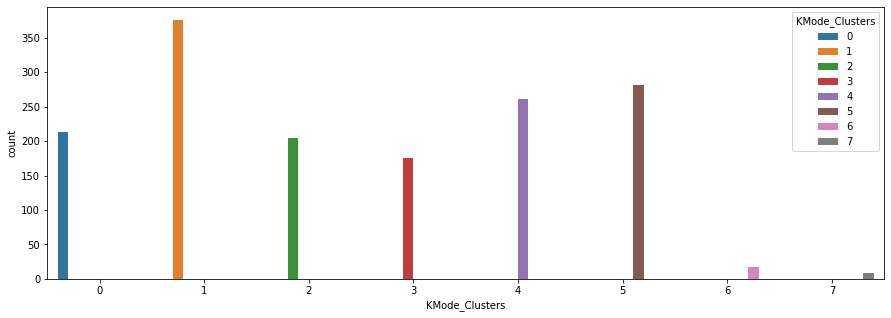

In [ ]:
for col in df2.columns:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='KMode_Clusters',hue=col, data = df2)
    plt.show()

In [ ]:
df2.groupby(['KMode_Clusters']).size()

KMode_Clusters
0    213
1    376
2    204
3    176
4    262
5    282
6     17
7      9
dtype: int64

In [ ]:
# See if varying number of clusters while training the model helps
Cluster_Number = np.arange(0, 8)
for i in Cluster_Number:
    print('Cluster Number : ', i)
    print('Fact_Checked:')
    print(df2[df2['KMode_Clusters'] == i]['Fact_Checked'].value_counts())
    print('Site_Pedigree:')
    print(df2[df2['KMode_Clusters'] == i]['Site_Pedigree'].value_counts())
    print('Registration_Irregularities:')
    print(df2[df2['KMode_Clusters'] == i]['Registration_Irregularities'].value_counts())
    print('Humor:')
    print(df2[df2['KMode_Clusters'] == i]['Humor'].value_counts())
    print('Emotionally Charged:')
    print(df2[df2['KMode_Clusters'] == i]['Emotionally_Charged'].value_counts())
    print('Narrative Writing:')
    print(df2[df2['KMode_Clusters'] == i]['Narrative_Writing'].value_counts())
    print('**************************************************************')

Cluster Number :  0
Fact_Checked:
Yes    195
No      18
Name: Fact_Checked, dtype: int64
Site_Pedigree:
Yes    204
No       9
Name: Site_Pedigree, dtype: int64
Registration_Irregularities:
No     211
Yes      2
Name: Registration_Irregularities, dtype: int64
Humor:
No     207
Yes      6
Name: Humor, dtype: int64
Emotionally Charged:
Yes    196
No      17
Name: Emotionally_Charged, dtype: int64
Narrative Writing:
Yes    143
No      70
Name: Narrative_Writing, dtype: int64
**************************************************************
Cluster Number :  1
Fact_Checked:
No    376
Name: Fact_Checked, dtype: int64
Site_Pedigree:
No    376
Name: Site_Pedigree, dtype: int64
Registration_Irregularities:
Yes    376
Name: Registration_Irregularities, dtype: int64
Humor:
No    376
Name: Humor, dtype: int64
Emotionally Charged:
Yes    333
No      43
Name: Emotionally_Charged, dtype: int64
Narrative Writing:
Yes    376
Name: Narrative_Writing, dtype: int64
*******************************************

###Test

In [ ]:
test2 = copy.deepcopy(test)
test2 = test2[['Fact_Checked', 'Site_Pedigree', 'Registration_Irregularities', 'Humor', 'Emotionally_Charged', 'Narrative_Writing']]

In [ ]:
test2

,Fact_Checked,Site_Pedigree,Registration_Irregularities,Humor,Emotionally_Charged,Narrative_Writing
0,No,No,No,No,Yes,Yes
1,No,No,No,Yes,Yes,No
2,No,No,No,No,Yes,No
3,No,No,No,Yes,Yes,Yes
4,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...
95,Yes,Yes,No,Yes,Yes,No
96,Yes,Yes,No,No,No,Yes
97,Yes,Yes,No,Yes,Yes,Yes
98,Yes,Yes,Yes,Yes,Yes,No


In [ ]:
t_Clusters = kmode.predict(test2)
t_Clusters

array([5, 2, 2, 3, 3, 2, 2, 3, 3, 2, 5, 2, 3, 2, 5, 2, 3, 2, 3, 3, 5, 2,
       5, 3, 3, 2, 5, 2, 2, 5, 7, 5, 3, 2, 5, 3, 2, 3, 2, 5, 3, 2, 3, 3,
       3, 2, 3, 3, 3, 2, 3, 3, 7, 3, 2, 7, 2, 2, 6, 3, 4, 4, 3, 4, 3, 3,
       1, 4, 3, 4, 4, 4, 3, 3, 4, 4, 6, 3, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint16)

In [ ]:
test['KMode_Clusters'] = t_Clusters
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Fact_Checked                 100 non-null    object 
 1   Label                        100 non-null    object 
 2   Site_Pedigree                100 non-null    object 
 3   Registration_Irregularities  100 non-null    object 
 4   Humor                        100 non-null    object 
 5   Sentiment                    100 non-null    float64
 6   Emotionally_Charged          100 non-null    object 
 7   Subjectivity_Score           100 non-null    float64
 8   Narrative_Writing            100 non-null    object 
 9   KMediods_Clusters            100 non-null    object 
 10  KMode_Clusters               100 non-null    uint16 
dtypes: float64(2), object(8), uint16(1)
memory usage: 8.1+ KB


In [ ]:
#Label our clusters
test['KMode_Clusters'] = test['KMode_Clusters'].map({0 : 'Opinion', 1 : 'Fake', 2 : 'Persuasive', 3 : 'Misreporting', 4 : 'Citizen Journalism',
                                                     5 : 'Sensationalist', 6 : 'Real', 7 : 'Satire'})

In [ ]:
test.loc[2, 'KMode_Clusters']

'Persuasive'

In [ ]:
KMediod_Accuracy = np.sum(test['Label'] == test['KMediods_Clusters'])
print('The K-Mediod Model accuracy is ' ,KMediod_Accuracy, '%')

The K-Mediod Model accuracy is  84 %


In [ ]:
KMode_Accuracy = np.sum(test['Label'] == test['KMode_Clusters'])
print('The K-Mode Model accuracy is ' ,KMode_Accuracy, '%')

The K-Mode Model accuracy is  81 %


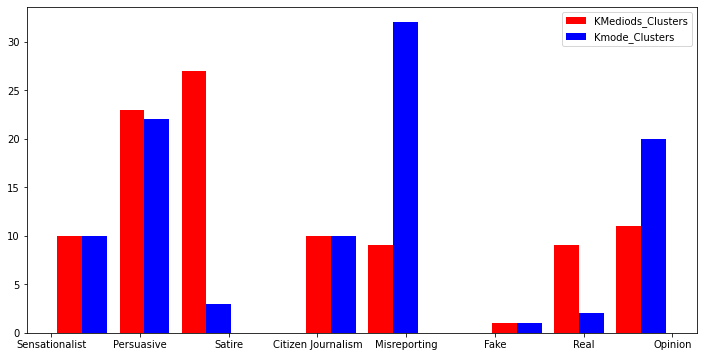

In [ ]:
plt.figure(figsize = (12, 6))
plt.hist([test['KMediods_Clusters'], test['KMode_Clusters']], label = ['KMediods_Clusters', 'Kmode_Clusters'], color = ['r', 'b'])
plt.legend()
plt.show()